In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [71]:
from sklearn.metrics import mean_squared_error

In [3]:
train_df = pd.read_csv('../data/TRAIN.csv')
test_df = pd.read_csv('../data/TEST_FINAL.csv')
sam_sub_df = pd.read_csv('../data/SAMPLE.csv')

In [4]:
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
train_df.shape, test_df.shape, sam_sub_df.shape

((188340, 10), (22265, 8), (22265, 2))

In [6]:
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [7]:
test_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [8]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [9]:
train_df['Discount'] = train_df['Discount'].map({'Yes': 1, 'No': 0})

In [10]:
test_df['Discount'] = test_df['Discount'].map({'Yes': 1, 'No': 0})

In [11]:
train_df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [12]:
test_df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [13]:
train_df.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [14]:
test_df.nunique()

ID               22265
Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Date                61
Holiday              2
Discount             2
dtype: int64

In [15]:
train_df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ID,188340,188340,T1119275,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_id,188340,NaN,NaN,NaN,NaT,NaT,183,105.366,1,92,183,274,365
Store_Type,188340,4,S1,88752,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Type,188340,5,L1,85140,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,188340,4,R1,63984,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,188340,516,2018-07-17 00:00:00,365,2018-01-01,2019-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,188340,NaN,NaN,NaN,NaT,NaT,0.131783,0.338256,0,0,0,0,1
Discount,188340,NaN,NaN,NaN,NaT,NaT,0.447536,0.497241,0,0,0,1,1
#Order,188340,NaN,NaN,NaN,NaT,NaT,68.2057,30.4674,0,48,63,82,371
Sales,188340,NaN,NaN,NaN,NaT,NaT,42784.3,18456.7,0,30426,39678,51909,247215


In [16]:
test_df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ID,22265,22265,T1198688,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_id,22265,NaN,NaN,NaN,NaT,NaT,183,105.368,1,92,183,274,365
Store_Type,22265,4,S1,10492,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Type,22265,5,L1,10065,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,22265,4,R1,7564,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,22265,61,2019-06-11 00:00:00,365,2019-06-01,2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,22265,NaN,NaN,NaN,NaT,NaT,0.0327869,0.178082,0,0,0,0,1
Discount,22265,NaN,NaN,NaN,NaT,NaT,0.426319,0.494552,0,0,0,1,1


In [17]:
x = train_df[['Store_id', 'Store_Type', 'Location_Type', 'Region_Code']].drop_duplicates()

In [18]:
x.head()

,Store_id,Store_Type,Location_Type,Region_Code
0,1,S1,L3,R1
1,253,S4,L2,R1
2,252,S3,L2,R1
3,251,S2,L3,R1
4,250,S2,L3,R4


In [19]:
x['Store_Type'].value_counts()

S1    172
S4     89
S2     56
S3     48
Name: Store_Type, dtype: int64

In [20]:
x['Location_Type'].value_counts()

L1    165
L2     94
L3     58
L5     27
L4     21
Name: Location_Type, dtype: int64

In [21]:
x['Region_Code'].value_counts()

R1    124
R2    105
R3     86
R4     50
Name: Region_Code, dtype: int64

In [22]:
x.groupby(['Region_Code', 'Location_Type', 'Store_Type'])['Store_id'].count()

Region_Code  Location_Type  Store_Type
R1           L1             S1            17
                            S2             2
                            S3            11
                            S4            21
             L2             S1             1
                            S3             4
                            S4            33
             L3             S1            13
                            S2             1
                            S3             3
             L4             S1             6
             L5             S1             4
                            S2             8
R2           L1             S1            35
                            S2             3
                            S3             7
                            S4             3
             L2             S1             6
                            S3             2
                            S4            13
             L3             S1            13
                

In [23]:
train_df[['Region_Code', 'Location_Type', 'Store_Type']].drop_duplicates().shape

(50, 3)

In [24]:
train_df[['Location_Type', 'Store_Type']].drop_duplicates().shape

(14, 2)

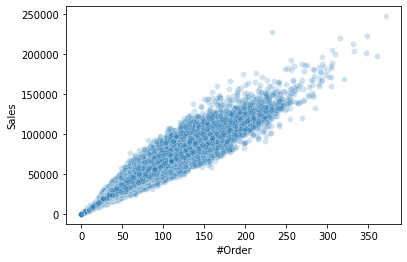

In [25]:
sns.scatterplot(train_df['#Order'], train_df['Sales'], alpha=0.2);

In [26]:
train_df[train_df['#Order'] == 0]['Sales'].describe()

count    19.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Sales, dtype: float64

In [27]:
train_df[train_df['Sales'] == 0]['#Order'].describe()

count    19.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: #Order, dtype: float64

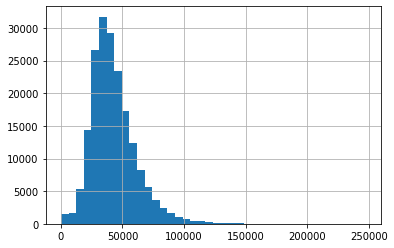

In [28]:
train_df['Sales'].hist(bins=40);

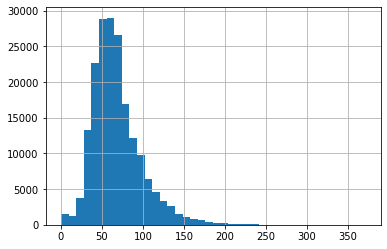

In [29]:
train_df['#Order'].hist(bins=40);

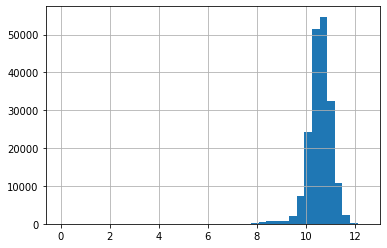

In [30]:
np.log(train_df['Sales'].replace(0,1)).hist(bins=40);

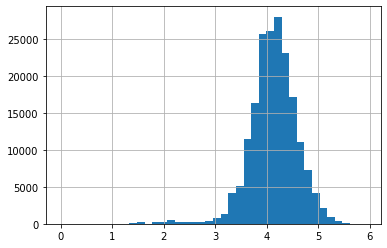

In [31]:
np.log(train_df['#Order'].replace(0,1)).hist(bins=40);

In [32]:
train_df[(train_df['Sales'] > 0)]['Sales'].min(), train_df[(train_df['#Order'] > 0)]['#Order'].min()

(708.12, 1)

In [33]:
train_df['Sales_log'] = np.log(train_df['Sales'].replace(0,1))
train_df['#Order_log'] = np.log(train_df['#Order'].replace(0,1))

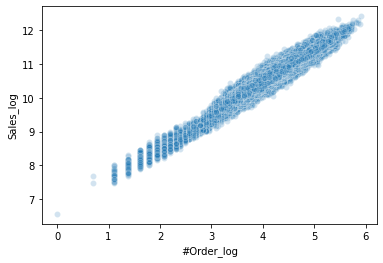

In [34]:
sns.scatterplot(train_df[train_df['Sales'] >0]['#Order_log'], train_df[train_df['Sales'] >0]['Sales_log'], alpha=0.2);

In [35]:
train_df.groupby('Region_Code')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Region_Code,,,,,,,,
R1,63984.0,46765.488405,21286.095441,0.0,32091.00,43125.0,57624.00,247215.0
R2,54180.0,40054.847344,16468.619529,0.0,29078.25,37548.0,48357.00,192156.0
R3,44376.0,42144.517063,16615.730308,0.0,30876.00,39661.5,50970.75,227127.0
R4,25800.0,39743.434249,15930.494396,2009.7,29195.64,37474.5,47796.00,161271.0


In [36]:
train_df.groupby('Location_Type')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Location_Type,,,,,,,,
L1,85140.0,41453.597889,13520.616642,0.00,32598.00,39831.000,48702.000,144789.0
L2,48504.0,59231.480373,20642.975708,0.00,45731.25,56235.975,69555.000,247215.0
L3,29928.0,33072.257756,10720.509117,0.00,26119.98,31987.200,39084.000,117495.0
L4,10836.0,29067.414313,9176.431608,1969.14,23075.25,28554.000,34413.750,91677.0
L5,13932.0,25187.787261,8990.099353,1748.28,19416.00,24528.000,30395.235,86203.2


In [37]:
train_df.groupby('Store_Type')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Store_Type,,,,,,,,
S1,88752.0,37676.511694,12303.151090,0.00,29859.0,36444.0,44439.00,143841.0
S2,28896.0,27530.828222,9168.839395,1748.28,21666.0,26794.5,32703.90,96363.0
S3,24768.0,47063.068209,14907.465521,0.00,37656.0,45445.5,55062.75,166323.0
S4,45924.0,59945.685926,20750.228035,0.00,46503.0,57075.0,70326.75,247215.0


In [38]:
train_df.groupby('Holiday')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Holiday,,,,,,,,
0,163520.0,43897.288998,18143.426019,0.0,31389.00,40530.00,52761.000,247215.00
1,24820.0,35451.878930,18822.332593,0.0,23778.57,33417.54,45247.125,197840.61


In [39]:
train_df.groupby('Discount')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
0,104051.0,37403.679678,16039.555183,0.00,27069.00,34791.0,44968.5,197840.61
1,84289.0,49426.497620,19071.656642,1969.14,36625.35,46242.0,58869.0,247215.00


In [40]:
xx = train_df.pivot_table(index='Date', columns='Store_id', values='Holiday')

In [41]:
xx.mean(axis=1).value_counts()

0.0    448
1.0     68
dtype: int64

In [156]:
xx = train_df.pivot_table(index='Date', columns='Store_id', values='Discount')

In [158]:
xx.mean(axis=1).value_counts().head()

0.008219    23
0.010959    22
0.989041    20
0.991781    19
0.002740    19
dtype: int64

In [160]:
train_df['DYM'] = train_df['Date'].dt.year.astype(str) + "-" + train_df['Date'].dt.month.astype(str)

In [161]:
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Sales_log,#Order_log,DYM
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,8.855355,2.197225,2018-1
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,10.854935,4.094345,2018-1
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,10.515105,3.737670,2018-1
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,9.889143,3.135494,2018-1
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,10.727981,4.127134,2018-1


In [162]:
x = train_df[train_df['Region_Code'] == 'R1']

In [163]:
xx = x.pivot_table(index='Date', columns='Store_id', values='Discount')

In [42]:
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Sales_log,#Order_log
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,8.855355,2.197225
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,10.854935,4.094345
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,10.515105,3.737670
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,9.889143,3.135494
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,10.727981,4.127134


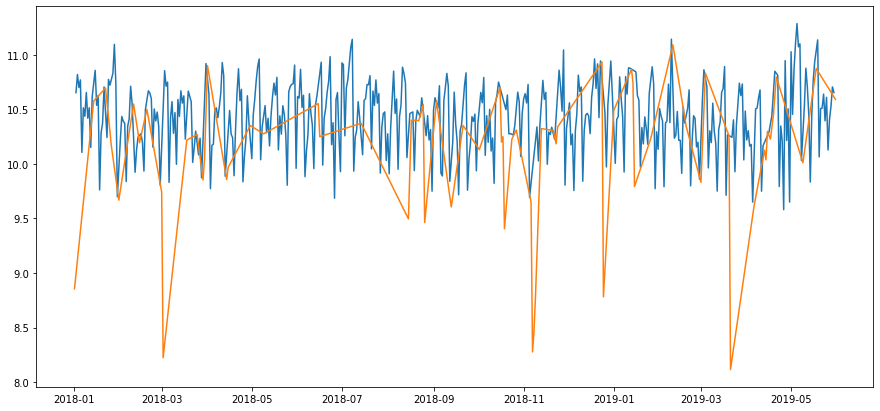

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(train_df[(train_df['Store_id']==1) & (train_df['Holiday'] == 0)]['Date'], train_df[(train_df['Store_id']==1) & (train_df['Holiday'] == 0)]['Sales_log'])
plt.plot(train_df[(train_df['Store_id']==1) & (train_df['Holiday'] == 1)]['Date'], train_df[(train_df['Store_id']==1) & (train_df['Holiday'] == 1)]['Sales_log'])
plt.show()

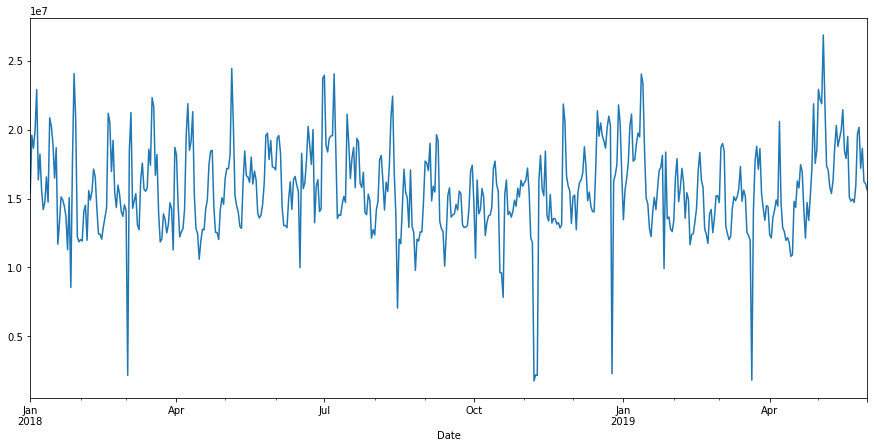

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
train_df.groupby('Date')['Sales'].sum().plot();


In [86]:
x = train_df.sort_values(['Store_id', 'Date'])

In [111]:
x['sales_rol_mean'] = x.groupby(['Store_id']).shift(61).rolling(window=28, min_periods=1)['Sales_log'].mean().values

In [112]:
x.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Sales_log,#Order_log,sales_rol_mean
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,8.855355,2.197225,NaN
607,T1000608,1,S1,L3,R1,2018-01-02,0,1,60,42369.00,10.654172,4.094345,NaN
1046,T1001047,1,S1,L3,R1,2018-01-03,0,1,72,50037.00,10.820518,4.276666,NaN
1207,T1001208,1,S1,L3,R1,2018-01-04,0,1,64,44397.00,10.700927,4.158883,NaN
1752,T1001753,1,S1,L3,R1,2018-01-05,0,1,63,47604.00,10.770672,4.143135,NaN


In [124]:
x['DYM'] = x['Date'].dt.year.astype(str) + "-" + x['Date'].dt.month.astype(str)

In [113]:
mean_squared_error(x[~x['sales_rol_mean'].isnull()]['Sales_log'], x[~x['sales_rol_mean'].isnull()]['sales_rol_mean']) * 1000

160.27676881414013

In [132]:
x.shape, x['sales_rol_mean'].isnull().sum()

((188340, 14), 12437)

In [145]:
for ym in x['DYM'].unique():
    print(ym)
    rx = x[(~x['sales_rol_mean'].isnull()) & (x['DYM'] == ym)]
    print(rx.shape)
    if rx.shape[0]!=0:
        print(mean_squared_error(rx['Sales_log'], rx['sales_rol_mean']) * 1000)

2018-1
(9828, 14)
289.69454165978226
2018-2
(0, 14)
2018-3
(10585, 14)
109.39217394404481
2018-4
(10950, 14)
81.97340572466881
2018-5
(11315, 14)
74.11684241851044
2018-6
(10950, 14)
86.65856864883897
2018-7
(11315, 14)
79.52044297573593
2018-8
(11315, 14)
103.59486582750387
2018-9
(10950, 14)
135.12182439475674
2018-10
(11315, 14)
113.36978747242061
2018-11
(10950, 14)
507.26381503164606
2018-12
(11315, 14)
219.3287818666456
2019-1
(11315, 14)
168.4003555813744
2019-2
(10220, 14)
105.01619598738237
2019-3
(11315, 14)
234.76892098171453
2019-4
(10950, 14)
144.72794778733538
2019-5
(11315, 14)
124.83645234248796


In [150]:
x.groupby('DYM')[['Holiday', 'Discount', 'Sales']].agg(['count', 'sum', 'mean'])

Holiday                 Discount                  Sales                \
          count   sum      mean    count   sum      mean  count           sum   
DYM                                                                             
2018-1    11315  1825  0.161290    11315  5467  0.483164  11315  5.066658e+08   
2018-10   11315  2555  0.225806    11315  5390  0.476359  11315  4.411538e+08   
2018-11   10950  2920  0.266667    10950  4446  0.406027  10950  4.178625e+08   
2018-12   11315   730  0.064516    11315  4854  0.428988  11315  5.258885e+08   
2018-2    10220  1095  0.107143    10220  3653  0.357436  10220  4.175890e+08   
2018-3    11315  2190  0.193548    11315  6186  0.546708  11315  4.718072e+08   
2018-4    10950  1460  0.133333    10950  3740  0.341553  10950  4.525465e+08   
2018-5    11315   365  0.032258    11315  5751  0.508263  11315  5.177403e+08   
2018-6    10950   730  0.066667    10950  5128  0.468311  10950  4.895277e+08   
2018-7    11315   365  0.032258    11315  5375  0.475033  11315  5.271139e+08   
2018-8    11315  1825  0.161290    11315  5583  0.493416  11315  4.528305e+08   
2018-9    10950  1095  0.100000    10950  5331  0.486849  10950  4.502989e+08   
2019-1    11315  1825  0.161290    11315  4878  0.431109  11315  5.112123e+08   
2019-2    10220   730  0.071429    10220  4462  0.436595  10220  4.086847e+08   
2019-3    11315  1460  0.129032    11315  4568  0.403712  11315  4.555606e+08   
2019-4    10950  2555  0.233333    10950  4242  0.387397  10950  4.403971e+08   
2019-5    11315  1095  0.096774    11315  5235  0.462660  11315  5.711210e+08   

                       
                 mean  
DYM                    
2018-1   44778.244619  
2018-10  38988.407398  
2018-11  38160.962496  
2018-12  46477.110199  
2018-2   40859.981422  
2018-3   41697.499485  
2018-4   41328.451847  
2018-5   45756.985029  
2018-6   44705.726389  
2018-7   46585.406232  
2018-8   40020.368869  
2018-9   41123.184822  
2019-1   45180.050845  
2019-2   39988.719869  
2019-3   40261.655088  
2019-4   40218.910858  
2019-5   50474.675785

In [154]:
test_df['DYM'] = test_df['Date'].dt.year.astype(str) + "-" + test_df['Date'].dt.month.astype(str)

In [155]:
test_df.groupby('DYM')[['Holiday', 'Discount']].agg(['count', 'sum', 'mean'])

Holiday                Discount                
         count  sum      mean    count   sum      mean
DYM                                                   
2019-6   10950  365  0.033333    10950  4723  0.431324
2019-7   11315  365  0.032258    11315  4769  0.421476

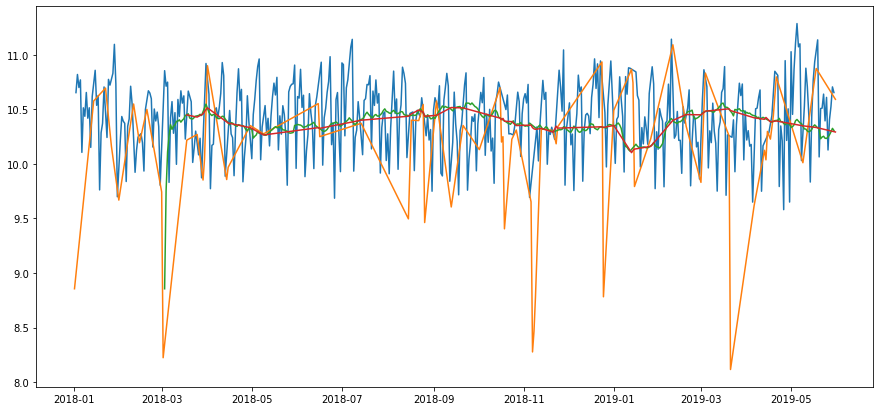

In [114]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(train_df[(train_df['Store_id']==1) & (train_df['Holiday'] == 0)]['Date'], train_df[(train_df['Store_id']==1) & (train_df['Holiday'] == 0)]['Sales_log'])
plt.plot(train_df[(train_df['Store_id']==1) & (train_df['Holiday'] == 1)]['Date'], train_df[(train_df['Store_id']==1) & (train_df['Holiday'] == 1)]['Sales_log'])

plt.plot(x[(x['Store_id']==1) & (x['Holiday'] == 0)]['Date'], x[(x['Store_id']==1) & (x['Holiday'] == 0)]['sales_rol_mean'])
plt.plot(x[(x['Store_id']==1) & (x['Holiday'] == 1)]['Date'], x[(x['Store_id']==1) & (x['Holiday'] == 1)]['sales_rol_mean'])

plt.show()

In [153]:
x.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Sales_log,#Order_log,sales_rol_mean,DYM
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,8.855355,2.197225,NaN,2018-1
607,T1000608,1,S1,L3,R1,2018-01-02,0,1,60,42369.00,10.654172,4.094345,NaN,2018-1
1046,T1001047,1,S1,L3,R1,2018-01-03,0,1,72,50037.00,10.820518,4.276666,NaN,2018-1
1207,T1001208,1,S1,L3,R1,2018-01-04,0,1,64,44397.00,10.700927,4.158883,NaN,2018-1
1752,T1001753,1,S1,L3,R1,2018-01-05,0,1,63,47604.00,10.770672,4.143135,NaN,2018-1
